# Worksheet 22

Name: Youxuan Ma

UID: U23330522

### Topics

- Neural Networks

## Neural Networks

Nothing to do in this worksheet except follow along in lecture / use this code to better understand Neural Networks.

In [6]:
import tensorflow as tf
import keras
print(tf.__version__)
print(keras.__version__)

2.15.0
2.15.0


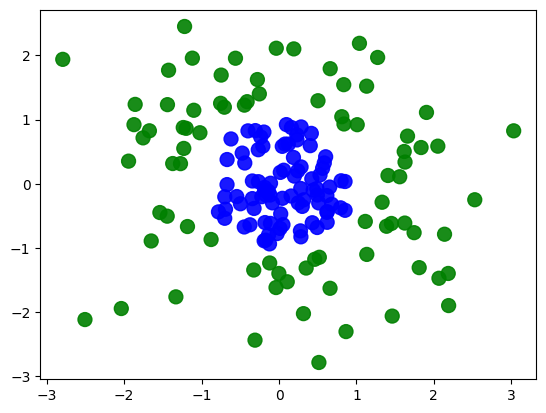

Epoch 1/500
166/166 [==============================] - 0s 441us/step - loss: 0.8197 - accuracy: 0.4819
Epoch 2/500
166/166 [==============================] - 0s 351us/step - loss: 0.8011 - accuracy: 0.4819
Epoch 3/500
166/166 [==============================] - 0s 345us/step - loss: 0.7871 - accuracy: 0.4759
Epoch 4/500
166/166 [==============================] - 0s 350us/step - loss: 0.7694 - accuracy: 0.4819
Epoch 5/500
166/166 [==============================] - 0s 573us/step - loss: 0.7647 - accuracy: 0.4157
Epoch 6/500
166/166 [==============================] - 0s 351us/step - loss: 0.7218 - accuracy: 0.4518
Epoch 7/500
166/166 [==============================] - 0s 349us/step - loss: 0.6958 - accuracy: 0.4518
Epoch 8/500
166/166 [==============================] - 0s 351us/step - loss: 0.6922 - accuracy: 0.4518
Epoch 9/500
166/166 [==============================] - 0s 368us/step - loss: 0.6863 - accuracy: 0.5060
Epoch 10/500
166/166 [==============================] - 0s 372us/step - l

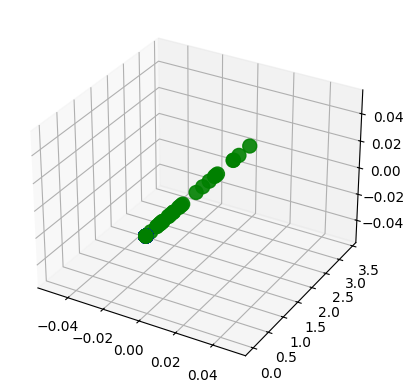

6/6 [==============================] - 0s 680us/step


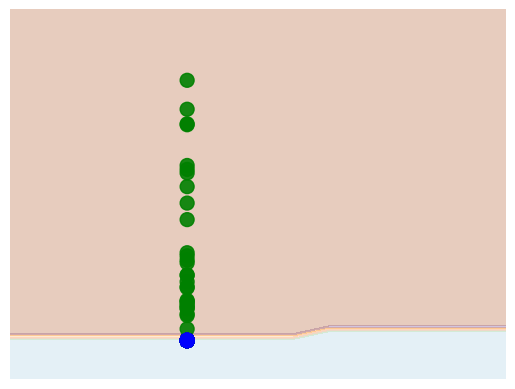

6/6 [==============================] - 0s 446us/step


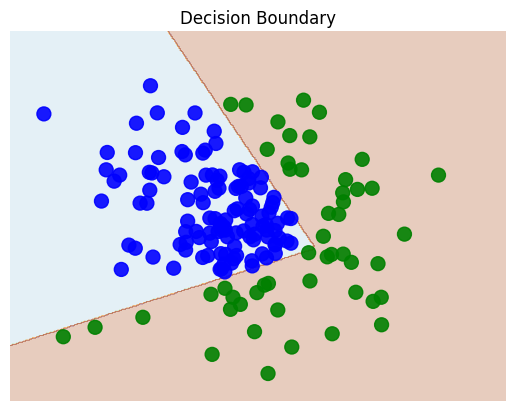

In [27]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from tensorflow import math, random, stack
import keras
from keras import layers, initializers
from keras.activations import relu
from keras.initializers import GlorotUniform
from keras.models import Sequential
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy
from keras.initializers import GlorotUniform
 
#       x[0] --- h1 
#            \ /    \
#             X       output
#            / \    /
#       x[1] --- h2
#
# This is the base model - nothing fancy here

# Set random seed for reproducibility
np.random.seed(1)
random.set_seed(1)

# Data generation - don't modify
centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=200, centers=centers, cluster_std=1,
                                random_state=1)

colors = np.array([x for x in 'bgrcmyk'])
colors = np.hstack([colors] * 20)

# CIRCLE
def generate_circle_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

# LINE
def generate_line_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : x[0] - x[1] < -.5 or x[0] - x[1] > .5, t)))
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

# CURVE
def generate_curve_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : m.cos(4*x[0]) - x[1] < -.5 or m.cos(4*x[0]) - x[1] > .5, t)))
    Y = np.array([1 if m.cos(4*x[0]) - x[1] >= 0 else 0 for x in X])
    return X, Y

# XOR
def generate_xor_data():
    X = np.array([
        [0,0],
        [0,1],
        [1,0],
        [1,1]])
    Y = np.array([x[0]^x[1] for x in X])
    return X, Y

PLOT_HIDDEN_LAYER_2D = False
PLOT_HIDDEN_LAYER_3D = True

# The model - modify this
# model = keras.models.Sequential()
# model.add(layers.Dense(3, input_dim=2, activation="sigmoid"))
# model.add(layers.Dense(1, activation="sigmoid"))
# model.compile(loss="binary_crossentropy")

# Modified model
model = Sequential([
    # the hidden layer with more neurons and Glorot uniform initializer
    layers.Dense(3, input_dim=2, activation='relu', kernel_initializer=GlorotUniform(seed=1)),
    # Dropout layer for regularization
    layers.Dropout(0.2),
    # Output layer with sigmoid activation for binary classification
    layers.Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and binary crossentropy loss
model.compile(optimizer=Adam(learning_rate=0.001),
                loss=BinaryCrossentropy(),
                metrics=['accuracy'])

X, Y = generate_circle_data(t)
# X, Y = generate_line_data(t)
# X, Y = generate_curve_data(t)
# X, Y = generate_xor_data()

# plot the data
plt.scatter(X[:,0],X[:,1],color=colors[Y].tolist(), s=100, alpha=.9)
plt.show()

history = model.fit(X, Y, batch_size=1, epochs=500)

if PLOT_HIDDEN_LAYER_2D:
    # Show the transformation of the input at the first hidden layer
    layer = model.layers[0]
    print(layer.get_config(), layer.get_weights())
    keras_function = keras.backend.function([model.input], [layer.output])
    layerVals = np.array(keras_function(X))[0]
    plt.scatter(layerVals[:,0], layerVals[:, 1], color=colors[Y].tolist(), s=100, alpha=.9)
    plt.show()

    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = layerVals[:, 0].min() - .5, layerVals[:, 0].max() + 1
    y_min, y_max = layerVals[:, 1].min() - .5, layerVals[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    meshData = np.c_[xx.ravel(), yy.ravel()]

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh
    fig, ax = plt.subplots()
    layer = model.layers[-1]

    intermediateModel = keras.models.Sequential()
    intermediateModel.add(layers.Dense(1, input_dim=2, activation="sigmoid"))
    intermediateModel.compile(loss="binary_crossentropy")
    intermediateModel.layers[0].set_weights(layer.get_weights())

    Z = intermediateModel.predict(meshData)
    Z = np.array([0 if x < .5 else 1 for x in Z])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=.3, cmap=plt.cm.Paired)

    T = intermediateModel.predict(layerVals)
    T = np.array([0 if x < .5 else 1 for x in T])
    T = T.reshape(layerVals[:, 0].shape)
    ax.scatter(layerVals[:, 0], layerVals[:, 1], color=colors[T].tolist(), s=100, alpha=.9)
    ax.set_xlabel("h0")
    ax.set_ylabel("h1")
    plt.show()

if PLOT_HIDDEN_LAYER_3D:
    # Show the transformation of the input at the first hidden layer
    layer = model.layers[0]
    print(layer.get_config(), layer.get_weights())
    keras_function = keras.backend.function([model.input], [layer.output])
    layerVals = np.array(keras_function(X))[0]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(layerVals[:,0], layerVals[:, 1], color=colors[Y].tolist(), s=100, alpha=.9)
    plt.show()

    # create a mesh to plot in
    h = .1  # step size in the mesh
    x_min, x_max = layerVals[:, 0].min() - .5, layerVals[:, 0].max() + 1
    y_min, y_max = layerVals[:, 1].min() - .5, layerVals[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    meshData = np.c_[xx.ravel(), yy.ravel(), np.zeros(len(xx.ravel()))]

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh
    fig, ax = plt.subplots()
    layer = model.layers[-1]

    intermediateModel = keras.models.Sequential()
    intermediateModel.add(layers.Dense(1, input_dim=3, activation="sigmoid"))
    intermediateModel.compile(loss="binary_crossentropy")
    intermediateModel.layers[0].set_weights(layer.get_weights())

    Z = intermediateModel.predict(meshData)
    Z = np.array([0 if x < .5 else 1 for x in Z])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=.3, cmap=plt.cm.Paired) # plot in 2D
    ax.axis('off')

    T = intermediateModel.predict(layerVals)
    T = np.array([0 if x < .5 else 1 for x in T])
    T = T.reshape(layerVals[:, 0].shape)
    ax.scatter(layerVals[:, 0], layerVals[:, 1], color=colors[T].tolist(), s=100, alpha=.9) # plot in 2D
    plt.show()

# Plot the decision boundary

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
Z = model.predict(meshData)
Z = np.array([0 if x < .5 else 1 for x in Z])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=.3, cmap=plt.cm.Paired)
ax.axis('off')

# Plot also the training points
T = model.predict(X)
T = np.array([0 if x < .5 else 1 for x in T])
T = T.reshape(X[:,0].shape)
ax.scatter(X[:, 0], X[:, 1], color=colors[T].tolist(), s=100, alpha=.9)
plt.title("Decision Boundary")
plt.show()

Epoch 1/100
34/34 [==============================] - 0s 554us/step - loss: 0.7355 - accuracy: 0.5361
Epoch 2/100
34/34 [==============================] - 0s 506us/step - loss: 0.7204 - accuracy: 0.4940
Epoch 3/100
34/34 [==============================] - 0s 493us/step - loss: 0.7030 - accuracy: 0.4880
Epoch 4/100
34/34 [==============================] - 0s 452us/step - loss: 0.7024 - accuracy: 0.5301
Epoch 5/100
34/34 [==============================] - 0s 462us/step - loss: 0.6931 - accuracy: 0.5241
Epoch 6/100
34/34 [==============================] - 0s 452us/step - loss: 0.6790 - accuracy: 0.5964
Epoch 7/100
34/34 [==============================] - 0s 779us/step - loss: 0.6639 - accuracy: 0.6084
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 0.6648 - accuracy: 0.5783
Epoch 9/100
34/34 [==============================] - 0s 554us/step - loss: 0.6568 - accuracy: 0.6205
Epoch 10/100
34/34 [==============================] - 0s 486us/step - loss: 0.6492 - accuracy

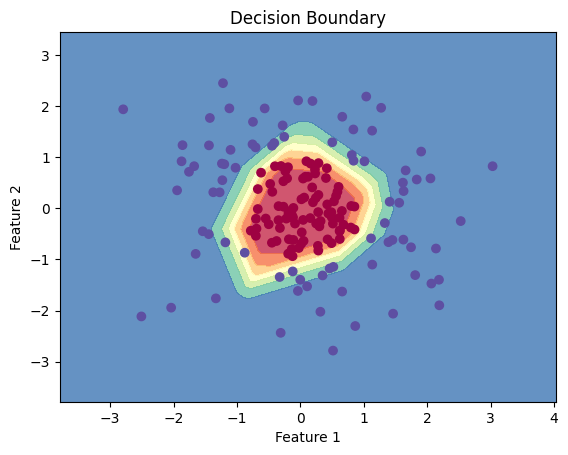

79/79 [==============================] - 0s 321us/step


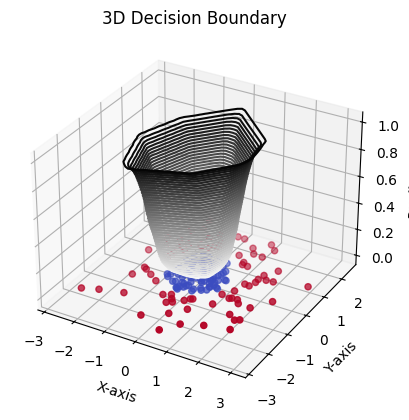

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras.models import Sequential
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy
from keras.initializers import GlorotUniform

# Build neural network model
def build_model(input_dim, learning_rate=0.001):
    """
    Builds an improved neural network model with additional layers and dropout for regularization.
    
    Parameters:
        input_dim (int): Dimensionality of the input data.
        learning_rate (float): Learning rate for the optimizer.

    Returns:
        model (keras.Model): Compiled keras sequential model.
    """
    # Initialize the model
    model = Sequential([
        # First hidden layer with more neurons and Glorot uniform initializer
        layers.Dense(8, input_dim=input_dim, activation='relu', kernel_initializer=GlorotUniform(seed=1)),
        # Dropout layer for regularization
        layers.Dropout(0.2),
        # Second hidden layer
        layers.Dense(4, activation='relu', kernel_initializer=GlorotUniform(seed=1)),
        # Output layer with sigmoid activation for binary classification
        layers.Dense(1, activation='sigmoid')
    ])
    
    # Compile the model with Adam optimizer and binary crossentropy loss
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss=BinaryCrossentropy(),
                  metrics=['accuracy'])
    
    return model

# Function to plot the decision boundaries of the model
def plot_decision_boundary(model, X, Y):
    """
    Plots the decision boundary created by the model along with the data points.
    
    Parameters:
        model (keras.Model): Trained keras model.
        X (np.ndarray): Input features.
        Y (np.ndarray): Labels.
    """
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01  # step size in the mesh
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

def plot_3d_decision_boundary(model, X, Y):
    """
    Plots the decision boundary and the data points in 3D space.
    
    Parameters:
        model (keras.Model): Trained keras model.
        X (np.ndarray): Input features.
        Y (np.ndarray): Labels.
    """
    # Create a mesh grid
    x_span = np.linspace(min(X[:, 0]), max(X[:, 0]), 50)
    y_span = np.linspace(min(X[:, 1]), max(X[:, 1]), 50)
    xx, yy = np.meshgrid(x_span, y_span)
    # Flatten the grid to pass into model
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Predict on the grid
    preds = model.predict(grid)
    
    # Get intermediate outputs for 3D plotting
    intermediate_layer_model = keras.Model(inputs=model.input,
                                           outputs=model.layers[0].output)
    intermediate_output = intermediate_layer_model.predict(grid)
    
    # Reshape predictions for contour plot
    zz = preds.reshape(xx.shape)

    # Plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.contour3D(xx, yy, zz, 50, cmap='binary')

    # Plot training points
    train_z = np.zeros(Y.shape)
    ax.scatter(X[:, 0], X[:, 1], train_z, c=Y, cmap='coolwarm')

    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Prediction')
    plt.title('3D Decision Boundary')
    plt.show()


X, Y = generate_circle_data(t)
# X, Y = generate_line_data(t)
# X, Y = generate_curve_data(t)
# X, Y = generate_xor_data()

model = build_model(input_dim=2)
history = model.fit(X, Y, epochs=100, batch_size=5, verbose=1)

# Plot the decisio boundary in 2D
plot_decision_boundary(model, X, Y)
# Plot the decision boundaries in 3D
plot_3d_decision_boundary(model, X, Y)
